In [1]:
%matplotlib inline

# TO-DO (2024-02-06):
## Mergin geometry and non spatial data after rotating geojson.
## Rotate and merge for the second time for better accuracy.
## update elem and rel siec files.


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform
from shapely.geometry import mapping
import xml.etree.ElementTree as ET
from xml.dom import minidom

In [3]:
# Replace 'path/to/your_shapefile.shp' with the actual path to your shapefile

geojson_path = '2024-01-24_elem-siec_isa.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
# '2024-01-31_warka_osm_2180.geojson'
#Skierniewice: '2024-02-01_skierniewice_2180_osm.geojson'


In [4]:
# Read the shapefile
gdf = gpd.read_file(geojson_path)

In [5]:
# Explore the GeoDataFrame
print(gdf.head())

     id   skrot   nazwa pochyl vmax_poc vmax_ezt vmax_t promien  \
0  None  es_1Sa  es_1Sa   None     None     None   None    None   
1  None  es_1Sb  es_1Sb   None     None     None   None    None   
2  None   es_2K   es_2K   None     None     None   None    None   
3  None   es_1K   es_1K   None     None     None   None    None   
4  None  es_1-2  es_1-2   None     None     None   None    None   

                                            geometry  
0  MULTILINESTRING ((722720.101 483088.065, 72276...  
1  MULTILINESTRING ((722767.897 483049.129, 72349...  
2  MULTILINESTRING ((722760.577 483042.707, 72320...  
3  MULTILINESTRING ((722759.164 483038.501, 72324...  
4  MULTILINESTRING ((723202.218 482716.668, 72324...  


<Axes: >

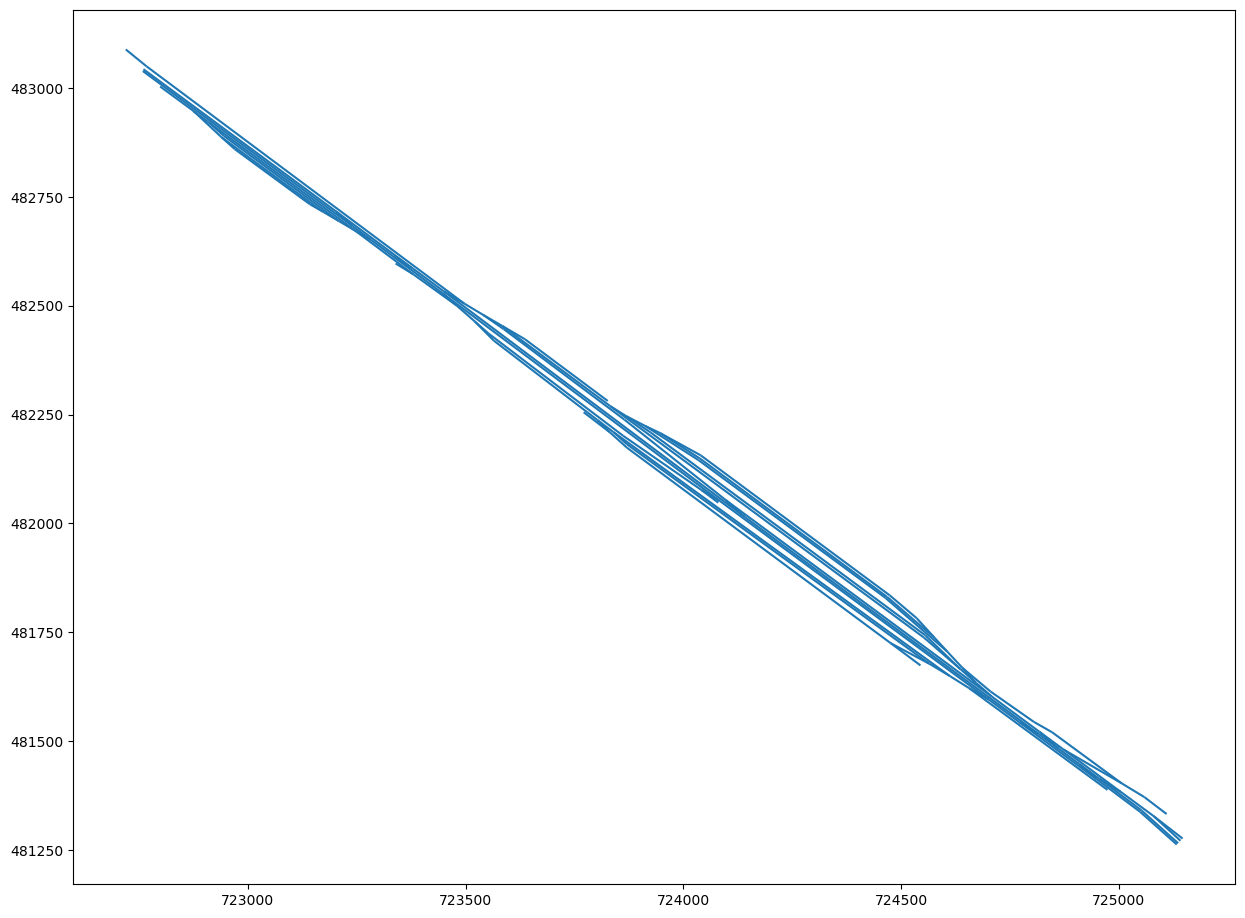

In [6]:
# Visualize the data
gdf.plot(figsize=(15, 15))

In [7]:
rotate_angle = 37

#Siedlce: 38

In [8]:
df_rotated2 = gdf.rotate(rotate_angle, origin=gdf.unary_union.centroid)

<Axes: >

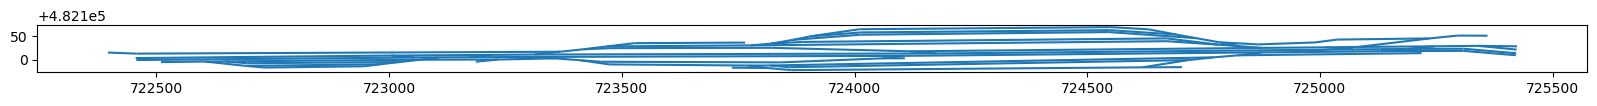

In [9]:
df_rotated2.plot(figsize=(20, 20))

In [10]:
# Explore the GeoDataFrame
print(gdf.head())

     id   skrot   nazwa pochyl vmax_poc vmax_ezt vmax_t promien  \
0  None  es_1Sa  es_1Sa   None     None     None   None    None   
1  None  es_1Sb  es_1Sb   None     None     None   None    None   
2  None   es_2K   es_2K   None     None     None   None    None   
3  None   es_1K   es_1K   None     None     None   None    None   
4  None  es_1-2  es_1-2   None     None     None   None    None   

                                            geometry  
0  MULTILINESTRING ((722720.101 483088.065, 72276...  
1  MULTILINESTRING ((722767.897 483049.129, 72349...  
2  MULTILINESTRING ((722760.577 483042.707, 72320...  
3  MULTILINESTRING ((722759.164 483038.501, 72324...  
4  MULTILINESTRING ((723202.218 482716.668, 72324...  


In [11]:
# Explore the GeoDataFrame
print(df_rotated2.head())

0    MULTILINESTRING ((722395.750 482115.390, 72245...
1    MULTILINESTRING ((722457.354 482113.059, 72336...
2    MULTILINESTRING ((722455.373 482103.525, 72300...
3    MULTILINESTRING ((722456.776 482099.315, 72305...
4    MULTILINESTRING ((723004.298 482108.925, 72305...
dtype: geometry


In [12]:
# TO DELETE

# Save the GeoDataFrame as a GeoJSON file
df_rotated2.to_file('temp.geojson', driver='GeoJSON')

In [13]:
#TO DELETE
geojson_path2 = 'temp.geojson'

In [14]:
# Wczytaj plik GeoJSON
gdf = gpd.read_file(geojson_path2)

In [15]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf.bounds.min()

In [16]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf['geometry'] = gdf.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [17]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0    MULTILINESTRING ((0.000 37.771, 61.604 35.440))
1  MULTILINESTRING ((61.604 35.440, 971.719 39.507))
2  MULTILINESTRING ((59.623 25.906, 608.548 31.306))
3  MULTILINESTRING ((61.025 21.696, 660.182 27.134))
4  MULTILINESTRING ((608.548 31.306, 660.182 27.1...


<Axes: >

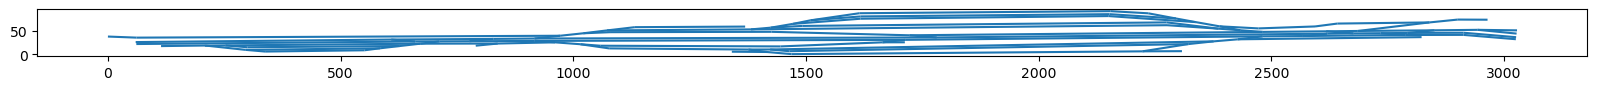

In [18]:
gdf.plot(figsize=(20, 20))

In [19]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

In [20]:
# Apply the scaling operation to the geometry column
gdf['geometry'] = gdf['geometry'].apply(scale_x, factor=1/4)

In [21]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0    MULTILINESTRING ((0.000 37.771, 15.401 35.440))
1  MULTILINESTRING ((15.401 35.440, 242.930 39.507))
2  MULTILINESTRING ((14.906 25.906, 152.137 31.306))
3  MULTILINESTRING ((15.256 21.696, 165.045 27.134))
4  MULTILINESTRING ((152.137 31.306, 165.045 27.1...


In [22]:
df_rotated3 = gdf.rotate(0, origin=gdf.unary_union.centroid)

<Axes: >

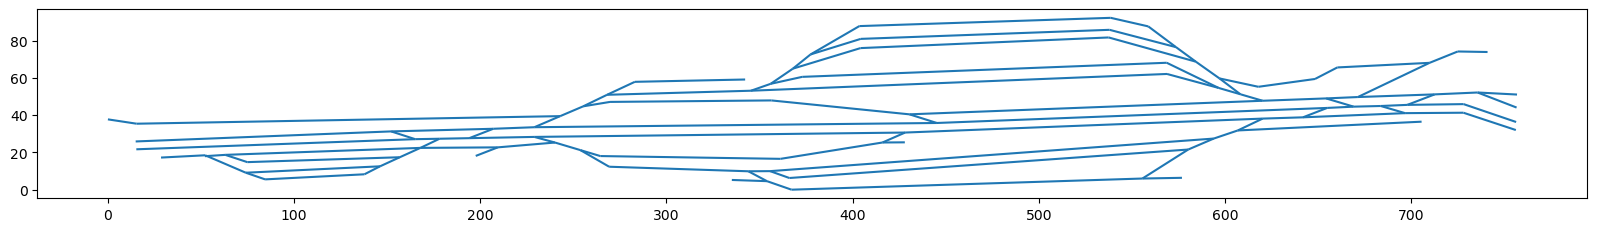

In [23]:
df_rotated3.plot(figsize=(20, 20))

In [24]:
print(df_rotated3.head())

0      MULTILINESTRING ((0.000 37.771, 15.401 35.440))
1    MULTILINESTRING ((15.401 35.440, 242.930 39.507))
2    MULTILINESTRING ((14.906 25.906, 152.137 31.306))
3    MULTILINESTRING ((15.256 21.696, 165.045 27.134))
4    MULTILINESTRING ((152.137 31.306, 165.045 27.1...
dtype: geometry


In [25]:
# Save the GeoDataFrame as a GeoJSON file
df_rotated3.to_file('2024-01-24_elem-siec_isa_rotated.geojson', driver='GeoJSON')

In [26]:
# RailML XML namespace
railml_ns = {"railml": "http://www.railml.org/schemas/2013"}

# Create RailML XML document
railml_root = ET.Element("railml", nsmap=railml_ns)

# Iterate through GeoDataFrame features
for index, row in gdf.iterrows():
    # Extract geometry from GeoDataFrame
    geometry = row['geometry']

    # Convert Shapely geometry to GeoJSON-like dictionary
    geometry_dict = mapping(geometry)

    # Create RailML track element
    track_element = ET.SubElement(railml_root, "track", nsmap=railml_ns)

    # Create RailML geometry element
    geometry_element = ET.SubElement(track_element, "geometry", nsmap=railml_ns)

    # Add RailML point elements based on GeoJSON-like geometry
    for coord in geometry_dict['coordinates']:
        point_element = ET.SubElement(geometry_element, "point", nsmap=railml_ns)
        point_element.set("x", str(coord[0]))
        point_element.set("y", str(coord[1]))
        # Add additional attributes as needed

# Create a formatted XML string
xml_string = ET.tostring(railml_root, encoding='utf-8')
xml_pretty_string = minidom.parseString(xml_string).toprettyxml(indent="  ")

# Save or print the RailML XML
with open("output_railml.xml", "w") as xml_file:
    xml_file.write(xml_pretty_string)


In [27]:
# Save the RailML XML to a file
output_file_path = "output_railml.xml"
with open(output_file_path, "w") as xml_file:
    xml_file.write(xml_pretty_string)

# Print a message indicating where the XML is saved
print(f"RailML XML saved to: {output_file_path}")

RailML XML saved to: output_railml.xml
